In [10]:
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import os
from os import listdir
from os.path import isfile, join
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
def load_images_from_folder(folder):
    train_data=[]
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
        img=~img
        if img is not None:
            ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
            ctrs,ret=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
            cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
            w=int(28)
            h=int(28)
            maxi=0
            for c in cnt:
                x,y,w,h=cv2.boundingRect(c)
                maxi=max(w*h,maxi)
                if maxi==w*h:
                    x_max=x
                    y_max=y
                    w_max=w
                    h_max=h
            im_crop= thresh[y_max:y_max+h_max+10, x_max:x_max+w_max+10]
            im_resize = cv2.resize(im_crop,(28,28))
            im_resize=np.reshape(im_resize,(784,1))
            train_data.append(im_resize)
    return train_data
                

In [12]:
data=[]
data=load_images_from_folder('C:\\Users\\ELITE\\Downloads\\archive (6)\\extracted_images\\-\\')
len(data)
for i in range(0,len(data)):
    data[i]=np.append(data[i],['10'])
    
print(len(data))

33997


In [13]:
data11=load_images_from_folder('C:\\Users\\ELITE\\Downloads\\archive (6)\\extracted_images\\+\\')

for i in range(0,len(data11)):
    data11[i]=np.append(data11[i],['11'])
data=np.concatenate((data,data11))
print(len(data))

59109


In [14]:
data0=load_images_from_folder('C:\\Users\\ELITE\\Downloads\\archive (6)\\extracted_images\\0\\')
for i in range(0,len(data0)):
    data0[i]=np.append(data0[i],['0'])
data=np.concatenate((data,data0))
print(len(data))

64574


In [15]:
data1=load_images_from_folder('C:\\Users\\ELITE\\Downloads\\archive (6)\\extracted_images\\,\\')
for i in range(0,len(data1)):
    data1[i]=np.append(data1[i],['1'])
data=np.concatenate((data,data1))
print(len(data))

66480


In [16]:
data2=load_images_from_folder('C:\\Users\\ELITE\\Downloads\\archive (6)\\extracted_images\\(\\')
for i in range(0,len(data2)):
    data2[i]=np.append(data2[i],['2'])
data=np.concatenate((data,data2))
print(len(data))

80774


In [17]:
data3=load_images_from_folder('C:\\Users\\ELITE\\Downloads\\archive (6)\\extracted_images\\,\\')

for i in range(0,len(data3)):
    data3[i]=np.append(data3[i],['3'])
data=np.concatenate((data,data3))
print(len(data))

82680


In [18]:
data4=load_images_from_folder('C:\\Users\\ELITE\\Downloads\\archive (6)\\extracted_images\\)\\')

for i in range(0,len(data4)):
    data4[i]=np.append(data4[i],['4'])
data=np.concatenate((data,data4))
print(len(data))

97035


In [19]:
data5=load_images_from_folder('C:\\Users\\ELITE\\Downloads\\archive (6)\\extracted_images\\!\\')

for i in range(0,len(data5)):
    data5[i]=np.append(data5[i],['5'])
data=np.concatenate((data,data5))
print(len(data))

98335


In [20]:
data6=load_images_from_folder('C:\\Users\\ELITE\\Downloads\\archive (6)\\extracted_images\\+\\')

for i in range(0,len(data6)):
    data6[i]=np.append(data6[i],['6'])
data=np.concatenate((data,data6))
print(len(data))

123447


In [21]:
data7=load_images_from_folder('C:\\Users\\ELITE\\Downloads\\archive (6)\\extracted_images\\-\\')

for i in range(0,len(data7)):
    data7[i]=np.append(data7[i],['7'])
data=np.concatenate((data,data7))
print(len(data))

157444


In [22]:
df=pd.DataFrame(data,index=None)
df.to_csv('train_data.csv',index=False)

In [23]:
data = pd.read_csv('train_data.csv',index_col=False)
labels = data[['784']]

In [24]:
data.drop(data.columns[[784]],axis=1,inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
3,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
4,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0


In [25]:
np.random.seed(1212)
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.image_data_format()

'channels_last'

In [26]:
labels=np.array(labels)

In [27]:
from keras.utils.np_utils import to_categorical
cat=to_categorical(labels,num_classes=13)

In [28]:
print(cat[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [29]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
3,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
4,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0


In [30]:
data.shape

(157444, 784)

In [31]:
temp=data.to_numpy()

In [32]:
X_train = temp.reshape(temp.shape[0], 28, 28, 1)

In [33]:
temp.shape[0]

157444

In [34]:
l=[]
for i in range(14326):
    l.append(np.array(data[i:i+1]).reshape(1,28,28))

In [35]:
np.random.seed(7)

In [36]:
len(l[0])

1

In [37]:
X_train.shape

(157444, 28, 28, 1)

In [38]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28,1), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(13, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 15)        4335      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 15)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 6, 6, 15)          0         
                                                                 
 flatten (Flatten)           (None, 540)               0

In [40]:
from keras.models import model_from_json

In [41]:
model.fit(X_train, cat, epochs=25, batch_size=200,shuffle=True,verbose=1)

Epoch 1/25
788/788 [==============================] - 46s 57ms/step - loss: 0.7274 - accuracy: 0.5857
Epoch 2/25
788/788 [==============================] - 47s 60ms/step - loss: 0.5770 - accuracy: 0.6028
Epoch 3/25
788/788 [==============================] - 48s 61ms/step - loss: 0.5661 - accuracy: 0.6065
Epoch 4/25
788/788 [==============================] - 50s 63ms/step - loss: 0.5599 - accuracy: 0.6065
Epoch 5/25
788/788 [==============================] - 49s 62ms/step - loss: 0.5554 - accuracy: 0.6090
Epoch 6/25
788/788 [==============================] - 47s 60ms/step - loss: 0.5531 - accuracy: 0.6076
Epoch 7/25
788/788 [==============================] - 46s 58ms/step - loss: 0.5500 - accuracy: 0.6070
Epoch 8/25
788/788 [==============================] - 45s 58ms/step - loss: 0.5487 - accuracy: 0.6078
Epoch 9/25
788/788 [==============================] - 45s 58ms/step - loss: 0.5473 - accuracy: 0.6108
Epoch 10/25
788/788 [==============================] - 45s 58ms/step - loss: 0.546

In [42]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))
model.save_weights("model_final.h5")

In [74]:
import cv2
import numpy as np
img = cv2.imread('C:\\Users\\ELITE\\Downloads\\archive (6)\\extracted_images\\0\\test_data.jpg',cv2.IMREAD_GRAYSCALE)
img

array([[255, 254, 254, ..., 255, 255, 255],
       [253, 255, 255, ..., 255, 255, 255],
       [255, 255, 253, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

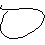

In [75]:
from IPython.display import Image
display(Image(filename='C:\\Users\\ELITE\\Downloads\\archive (6)\\extracted_images\\0\\test_data.jpg',width=250))

In [76]:
if img is not None:
    img=~img
    ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ctrs,ret=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w=int(28)
    h=int(28)
    train_data=[]
    print(len(cnt))
    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    print(rects)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    print(bool_rect)
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    print(len(dump_rect)) 
    final_rect=[i for i in rects if i not in dump_rect]
    print(final_rect)
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]
        im_resize = cv2.resize(im_crop,(28,28))
        im_resize=np.reshape(im_resize,(28,28,1))
        train_data.append(im_resize)

1
[[0, 5, 45, 34]]
[[0]]
0
[[0, 5, 45, 34]]


In [77]:
equation=''
for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    result=np.argmax(model.predict(train_data[i]), axis=-1)
    if(result[0]==10):
        equation = equation +'-'
    if(result[0]==11):
        equation = equation +'+'
    if(result[0]==12):
        equation = equation +'*'
    if(result[0]==0):
        equation = equation +'0'
    if(result[0]==1):
        equation = equation +'1'
    if(result[0]==2):
        equation = equation +'2'
    if(result[0]==3):
        equation = equation +'3'
    if(result[0]==4):
        equation = equation +'4'
    if(result[0]==5):
        equation = equation +'5'
    if(result[0]==6):
        equation = equation +'6'
    if(result[0]==7):
        equation = equation +'7'
    if(result[0]==8):
        equation = equation +'8'
    if(result[0]==9):
        equation = equation +'9'
    
print(equation)

1/1 [==============================] - 0s 230ms/step
0


In [78]:
eval(equation)

0